In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm.notebook as tqdm

In [4]:
# another dataset to test
#https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
# df = pd.read_csv('./Reviews.csv')

### Load Data

In [5]:
df = pd.read_csv('nytimes_data_final.csv')

In [6]:
corpus = df['text'].values

In [7]:
len(corpus)

5299

### Configurations

In [8]:
lowercase = True
tokenizer = lambda x: x.split()
analyzer = 'word'
stop_words = 'english'
ngram_range = (1,1)
max_features = None
norm = 'l2'
smooth_idf = True

### The Fast Version

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
vectorizer = TfidfVectorizer(lowercase=lowercase,
                            tokenizer=tokenizer,
                            analyzer=analyzer,
                            stop_words=stop_words,
                            ngram_range=ngram_range,
                            max_features=max_features,
                            norm=norm,
                            smooth_idf=smooth_idf)

In [11]:
X = vectorizer.fit_transform(corpus)

In [12]:
vectorizer.get_feature_names_out()

array(['#blacklivesmatter,', '#blackouttuesday:', '#metoo', ...,
       '“what’s', '…', '…’'], dtype=object)

In [13]:
X.shape

(5299, 7718)

In [14]:
w2i = vectorizer.vocabulary_ 

### Functions

In [15]:
def calculate_similarity(embedding, q):
    sims = []
    for i in tqdm.tqdm(range(embedding.shape[0])):
        v = embedding[i].toarray().reshape(-1,)
        q = q.reshape(-1,)
        sim = np.dot(q, v)/(np.linalg.norm(q)* np.linalg.norm(q))
        sims.append(sim)
    return sims

### Use It - Similarity among Documents

In [16]:
query = 'Trump twitter'

In [17]:
v_query = vectorizer.transform([query]).toarray()


In [18]:
v_query

array([[0., 0., 0., ..., 0., 0., 0.]])

In [19]:
sims = calculate_similarity(X, v_query)

  0%|          | 0/5299 [00:00<?, ?it/s]

In [20]:
idx = np.argsort(sims)[::-1]

In [21]:
corpus[idx[:5]]

array(['Another Tweet From Trump Gets a Label From Twitter',
       'Another Tweet From Trump Gets a Label From Twitter',
       'Facebook and Twitter Must Do More About Trump’s Tweets',
       'Facebook and Twitter Must Do More About Trump’s Tweets',
       'Facebook and Twitter Must Do More About Trump’s Tweets'],
      dtype=object)

### Visualize it

In [22]:
from sklearn.decomposition import PCA

In [23]:
#https://web.stanford.edu/class/cs224n/materials/Gensim%20word%20vector%20visualization.html
def display_pca_scatterplot(words=None, cs=None):
    idx = [w2i.get(w) for w in words]
    word_vectors = X.T[idx].toarray()
    twodim = PCA().fit_transform(word_vectors)[:,:2]
    plt.figure(figsize=(10,10))
    plt.scatter(twodim[:,0], twodim[:,1], s=100, edgecolors='k', c='r' if not cs else cs)
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

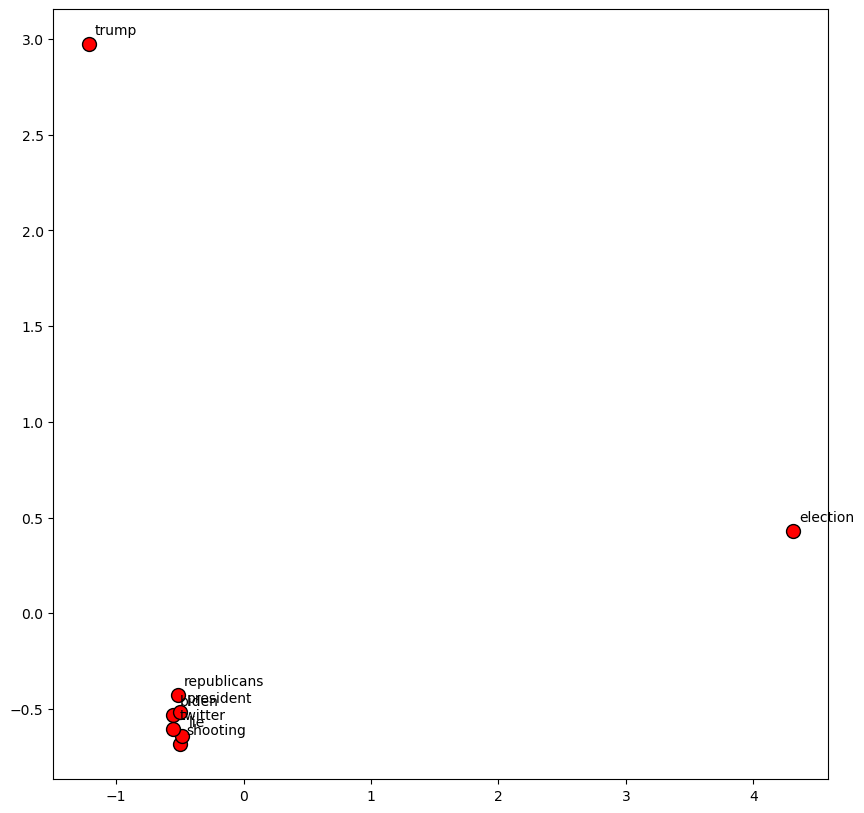

In [24]:
display_pca_scatterplot(['trump',
                         'republicans',
                         'biden', 
                         'president', 
                         'shooting', 
                         'election', 
                         'lie',
                         'twitter'])